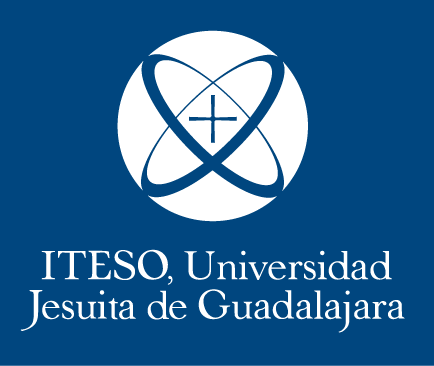

## <center> Quantitative Finance S. 2022 <center/>
## <center> Professor José Mario Zárate <center/>
### <center> Homework 10 <center/>

### <center> Díaz Verduzco Alexia Marisol IF720500 <center/>
### <center> González Reyes Christian Eduardo IF721850 <center/>
### <center> López Lazareno Diego Alberto IF722100 <center/>
### <center> Romero Riggen Santiago IF715099 <center/>

### Determinar la cantidad de pasos a la que converge una opcion europea de compra y otra de venta (ambas OOM).  Comparado con black & scholes.  Ya que saben los pasos, valuar las opciones como americanas

In [1]:
# Librerías 
import numpy as np
import scipy.stats as st

In [2]:
# Parámetros
S=100
K=100
r=0.05
sigma=0.3
T=1
n=2

In [13]:
## OPCIÓN EUROPEA

# B&S
def BS(S,K,r,sigma,T):     
            
    #VALIDACIÓN

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    result = (K * np.exp(-r * T) * st.norm.cdf(-d2, 0.0, 1.0))-(S* st.norm.cdf(-d1, 0.0, 1.0)) # put
    #result = (S* st.norm.cdf(d1, 0.0, 1.0)) - (K * np.exp(-r * T) * st.norm.cdf(d2, 0.0, 1.0)) #call
    
    return result


# Árbol 
def opcion_europea(S,K,r,sigma,T,n):
    

    dt= T/n
    u= np.exp(sigma*np.sqrt(dt))
    d= 1/u
    p= (np.exp(r*dt)-d)/(u-d)

    stockvalue = np.zeros((n+1,n+1))

    stockvalue[0,0]=S

    for i in range(1, n+1):
        stockvalue[i,0]=stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j]=stockvalue[i-1,j-1]*d

    optionvalue= np.zeros((n+1,n+1))

    for i in range(n+1):
        optionvalue[n,i]=max(K-stockvalue[n,i],0) #put
        #optionvalue[n,1]=max(optionvalue[n,1]-K,0) #call

    for i in range (n-1,-1,-1):
        for j in range(i+1):optionvalue[i,j]=np.exp(-r*dt)*(p*optionvalue[i+1,j] + (1-p)*optionvalue[i+1,j+1])

    return optionvalue[0,0]

BS(S,K,r,sigma,T),opcion_europea(S,K,r,sigma,T,n)

(9.354197236057232, 8.013409102488586)